In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
# DataFrame containing only possible predictors of housing price
correlation_df = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

# Data frame which will contain the name of a predictor and its corresponding r-squared value
r_squared_df = pd.DataFrame(columns=['r_squared', 'predictor'])

# Loop through each predictor, calculate r-squared, and insert into the DataFrame
x = df['price']
for i in range(len(correlation_df.columns)):
    y = correlation_df[correlation_df.columns[i]]
    r_squared = scipy.stats.linregress(x, y).rvalue**2
    r_squared_df.loc[len(r_squared_df)] = [r_squared, correlation_df.columns[i]]

# Sort the values, reset incidies, and display the table
r_squared_df = r_squared_df.sort_values('r_squared', ascending = False)
r_squared_df = r_squared_df.reset_index(drop=True)
r_squared_df

,r_squared,predictor
0,0.492853,sqft_living
1,0.445468,grade
2,0.366712,sqft_above
3,0.342668,sqft_living15
4,0.275769,bathrooms
5,0.157842,view
6,0.104857,sqft_basement
7,0.095079,bedrooms
8,0.094251,lat
9,0.070953,waterfront


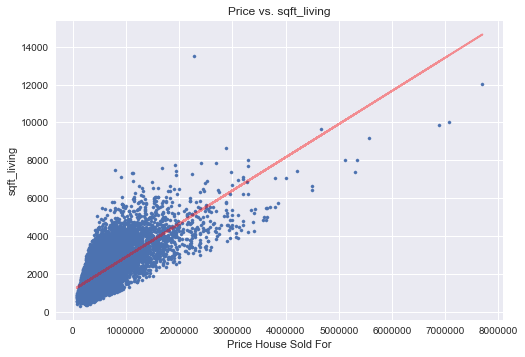

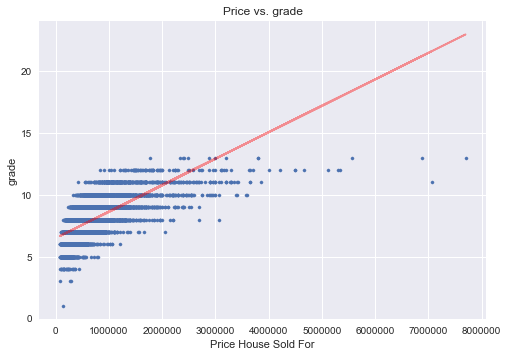

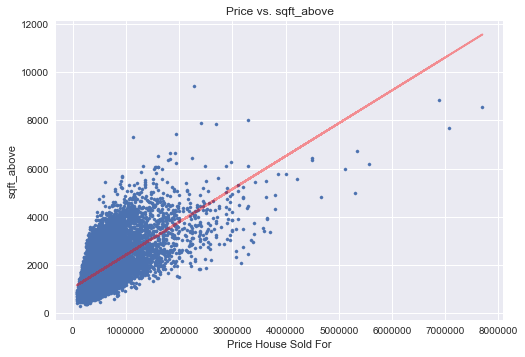

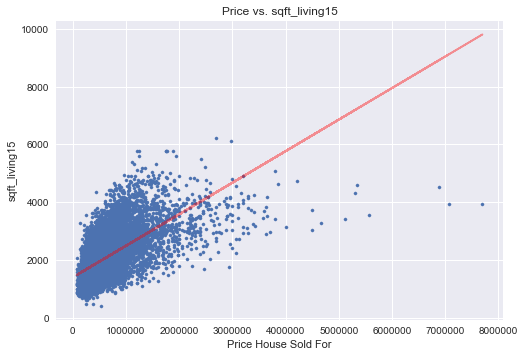

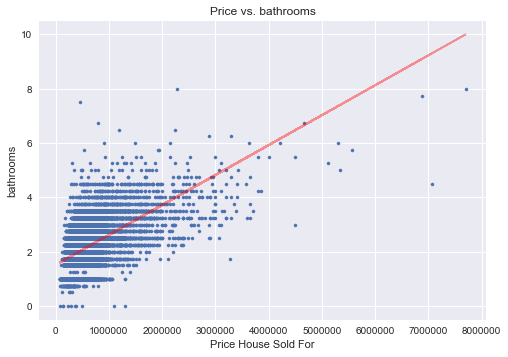

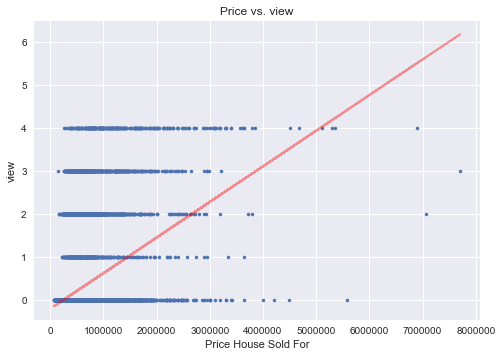

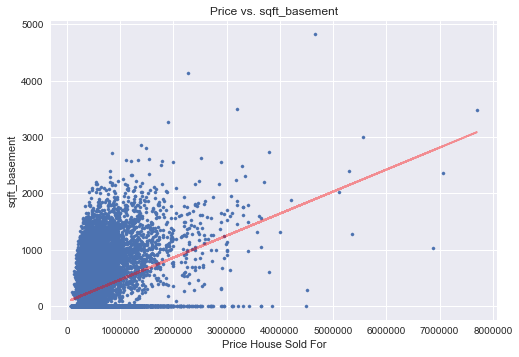

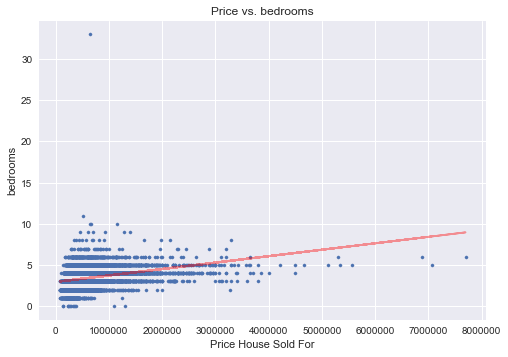

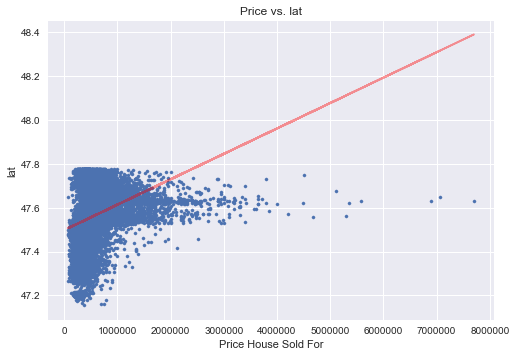

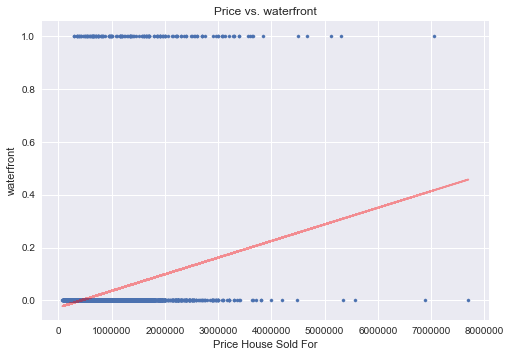

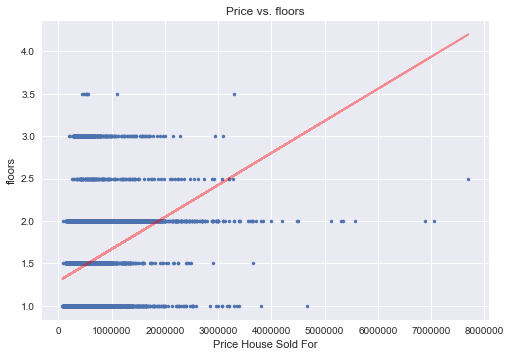

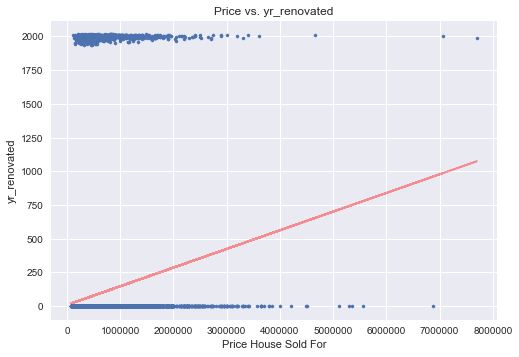

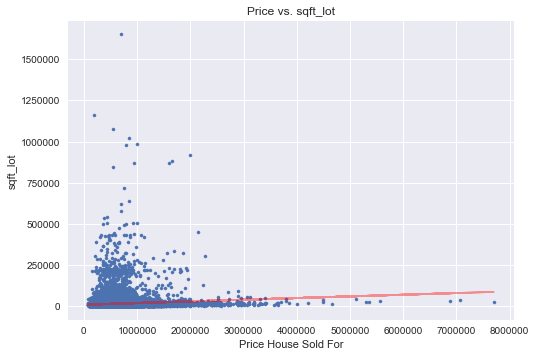

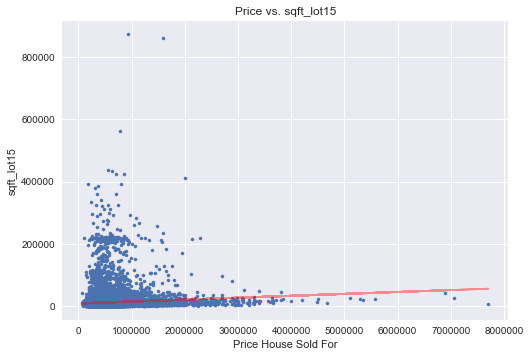

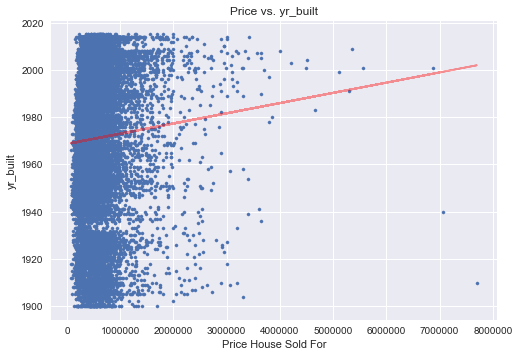

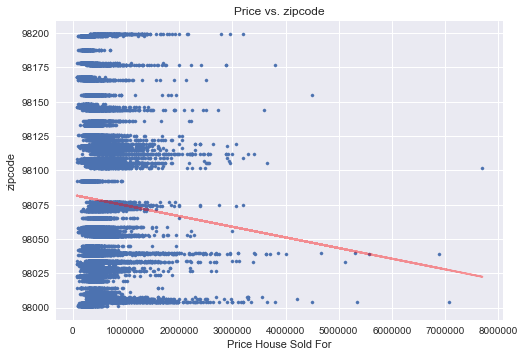

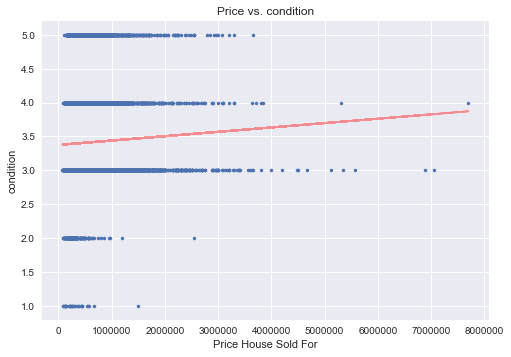

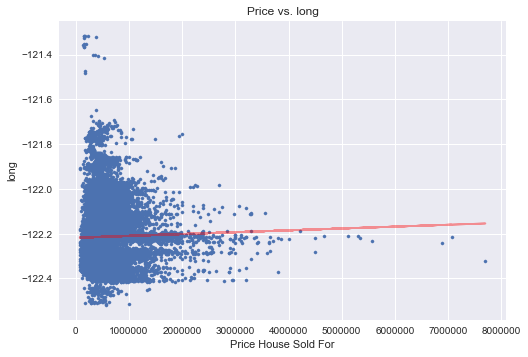

In [4]:
# Loop through each predictor and display the scatter plot
for i in range(len(r_squared_df)):
    y = correlation_df[r_squared_df['predictor'][i]]
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    plt.scatter(x, y, s=10)
    plt.plot(x, intercept + slope*x, 'r', label='fitted line', alpha=0.4)
    plt.title("Price vs. " + r_squared_df['predictor'][i])
    plt.ylabel(r_squared_df['predictor'][i])
    plt.xlabel("Price House Sold For")
    plt.show()
    print()
    print()